1 - Identificando Outliers com Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Carregar a base de dados
df_base = pd.read_csv("C:/Users/tacio/Documents/Python Scripts/dados_outliers.csv")

# Visualizar as primeiras linhas da base
print(df_base.head())

   ID      Idade      Salário  Horas de Trabalho
0   1  39.967142  5429.344832          32.027862
1   2  33.617357  5672.941432          37.003125
2   3  41.476885  6299.661492          40.026218
3   4  50.230299  6264.562462          40.234903
4   5  32.658466  3346.796758          37.749673


In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 200 non-null    int64  
 1   Idade              200 non-null    float64
 2   Salário            200 non-null    float64
 3   Horas de Trabalho  200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


 ---- IDENTIFICANDO OUTLIERS COM AMPLITUDE INTERQUARTIL ----

In [14]:
def find_outliers_iqr(data_frame):
    outliers_dict = {}
    for coluna in data_frame.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(data_frame[coluna], 25)  # Primeiro quartil (25%)
        q3 = np.percentile(data_frame[coluna], 75)  # Terceiro quartil (75%)
        iqr = q3 - q1  # Intervalo Interquartil
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Filtrar os valores que estão fora dos limites
        outliers = data_frame[(data_frame[coluna] < limite_inferior) | (data_frame[coluna] > limite_superior)]
        outliers_dict[coluna] = outliers[coluna].values
    return outliers_dict

In [15]:
# Identificar outliers em todas as colunas
outliers_encontrados = find_outliers_iqr(df_base)

In [16]:
# Exibir os resultados
print("Outliers identificados por coluna:")
for coluna, outliers in outliers_encontrados.items():
    print(f"\nColuna: {coluna}")
    print(f"Outliers: {outliers if len(outliers) > 0 else 'Nenhum outlier encontrado'}")

Outliers identificados por coluna:

Coluna: ID
Outliers: Nenhum outlier encontrado

Coluna: Idade
Outliers: [120.           5.           8.80254896  59.63242112  62.20169167]

Coluna: Salário
Outliers: [ 9623.27778879 30000.           500.          1110.47919192]

Coluna: Horas de Trabalho
Outliers: [100.           5.          55.39440404]


In [17]:
# Gerar gráficos boxplot
def plotar_boxplots(data_frame):
    colunas_numericas = data_frame.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 8))
    for i, coluna in enumerate(colunas_numericas, 1):
        plt.subplot(2, len(colunas_numericas) // 2 + 1, i)
        plt.boxplot(data_frame[coluna], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        plt.title(f"Boxplot - {coluna}")
        plt.xlabel(coluna)
    plt.tight_layout()
    plt.show()

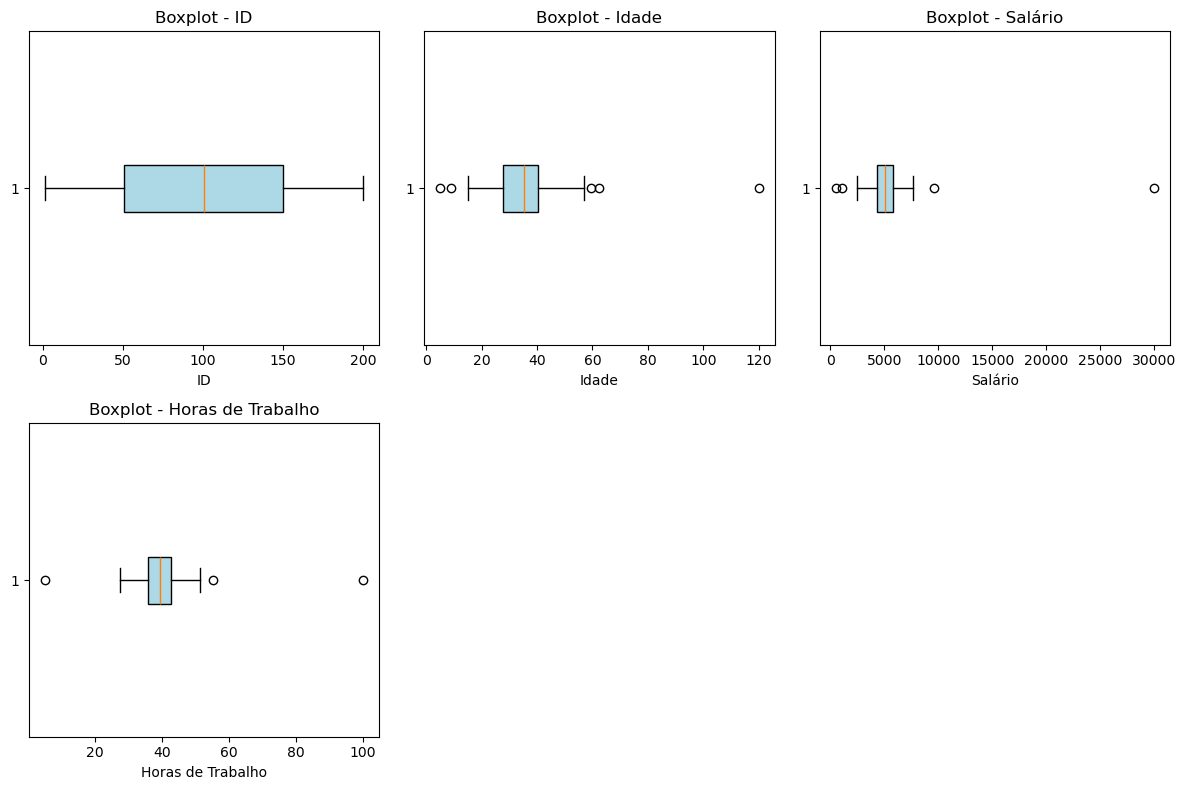

In [18]:
# Gráfico boxplot
plotar_boxplots(df_base)